In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Path to the main data folder
data_folder = './data'

# Initialize an empty list to store the combined data
data = []

In [3]:
# Iterate through each folder in the data directory
for label in os.listdir(data_folder):
    label_folder = os.path.join(data_folder, label)
    
    # Ensure it's a folder
    if os.path.isdir(label_folder):
        # Iterate through CSV files in the folder
        for file in os.listdir(label_folder):
            file_path = os.path.join(label_folder, file)
            
            # Check if the file is a CSV
            if file.endswith('.csv'):
                # Load the CSV and add the label
                temp_data = pd.read_csv(file_path)
                temp_data['Label'] = label  # Assign the folder name as the label
                data.append(temp_data)

# Combine all the data into a single DataFrame
df = pd.concat(data, ignore_index=True)

In [4]:
# Check for duplicates based on the 'Title' column
if 'Title' in df.columns:
    duplicates = df[df.duplicated(subset='Title', keep=False)]  # View duplicates for review
    print(f"Number of duplicate rows based on 'Title': {len(duplicates)}")

    # Remove duplicates, keeping the first occurrence
    df = df.drop_duplicates(subset='Title', keep='first')
    print("Duplicates removed. Remaining rows:", len(df))
else:
    print("The 'Title' column is not in the dataset.")

Number of duplicate rows based on 'Title': 0
Duplicates removed. Remaining rows: 19999


In [7]:
# Remove rows where 'Content' is not a string
df = df[df['Content'].apply(lambda x: isinstance(x, str))]
print("Number of valid text rows:", len(df))

# Re-check for missing or unexpected data
print("Number of missing values in 'Content':", df['Content'].isnull().sum())
print("Sample of problematic 'Content' rows:")
print(df[df['Content'].str.strip() == ""].head())

# Remove rows with empty or invalid 'Content'
df = df[df['Content'].str.strip() != ""]
print("Data cleaned. Remaining rows:", len(df))

Number of valid text rows: 19999
Number of missing values in 'Content': 0
Sample of problematic 'Content' rows:
Empty DataFrame
Columns: [Title, Date, Author, Content, Label]
Index: []
Data cleaned. Remaining rows: 19999


In [8]:
print(df.head())

                                               Title  \
0  Wamenkeu: Konflik Israel Vs Iran Kita Perhatik...   
1  Grup BUMI Raih 3 Penghargaan Bergengsi di Anug...   
2  450 Karyawan Tokopedia Dikabarkan Kena PHK, In...   
3  3 Aset yang Diproyeksi Naik di Tengah Ancaman ...   
4  Pengelolaan Risiko ESG Kuat, Rating Sustainaly...   

                                Date  \
0   Kamis, 18 April 2024 - 11:26 WIB   
1  Rabu, 14 Agustus 2024 - 20:02 WIB   
2    Kamis, 13 Juni 2024 - 16:57 WIB   
3  Kamis, 8 Agustus 2024 - 14:37 WIB   
4    Minggu, 7 Juli 2024 - 11:36 WIB   

                                       Author  \
0         Oleh :Raden Jihad Akbar,Anisa Aulia   
1   Oleh :Fikri Halim,Mohammad Yudha Prasetya   
2   Oleh :Fikri Halim,Mohammad Yudha Prasetya   
3  Oleh :Siska Permata Sari,Raden Jihad Akbar   
4                            Oleh :Dera Fitri   

                                             Content   Label  
0  jakarta wakil menteri keuangan suahasil nazara...  bisnis  
1

In [ ]:
# Assuming the text to classify is in a column named 'Content'
X = df['Content']  # Features: text content
y = df['Label']    # Labels: folder names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Text preprocessing and feature extraction using TF-IDF (stopwords already removed)
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [12]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [14]:
# Transform X_test using the same TF-IDF vectorizer used during training
X_test_tfidf = vectorizer.transform(X_test)

# Predict using the trained model
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.938
Classification Report:
               precision    recall  f1-score   support

      bisnis       0.91      0.94      0.92       995
     digital       0.92      0.90      0.91      1024
     edukasi       0.93      0.92      0.93      1004
     militer       0.99      1.00      0.99       977

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000



In [ ]:
# Predicting for new data
new_texts = ["WhatsApp menjelaskan ikon typing bubble itu berlaku baik untuk obrolan individu maupun di dalam grup. Saat lawan bicara mengetik, WhatsApp juga akan menampilkan foto profil di samping typing bubble tersebut."]
new_texts_tfidf = vectorizer.transform(new_texts)
predicted_labels = model.predict(new_texts_tfidf)
print("Predicted Labels:", predicted_labels)

Predicted Labels: ['digital']


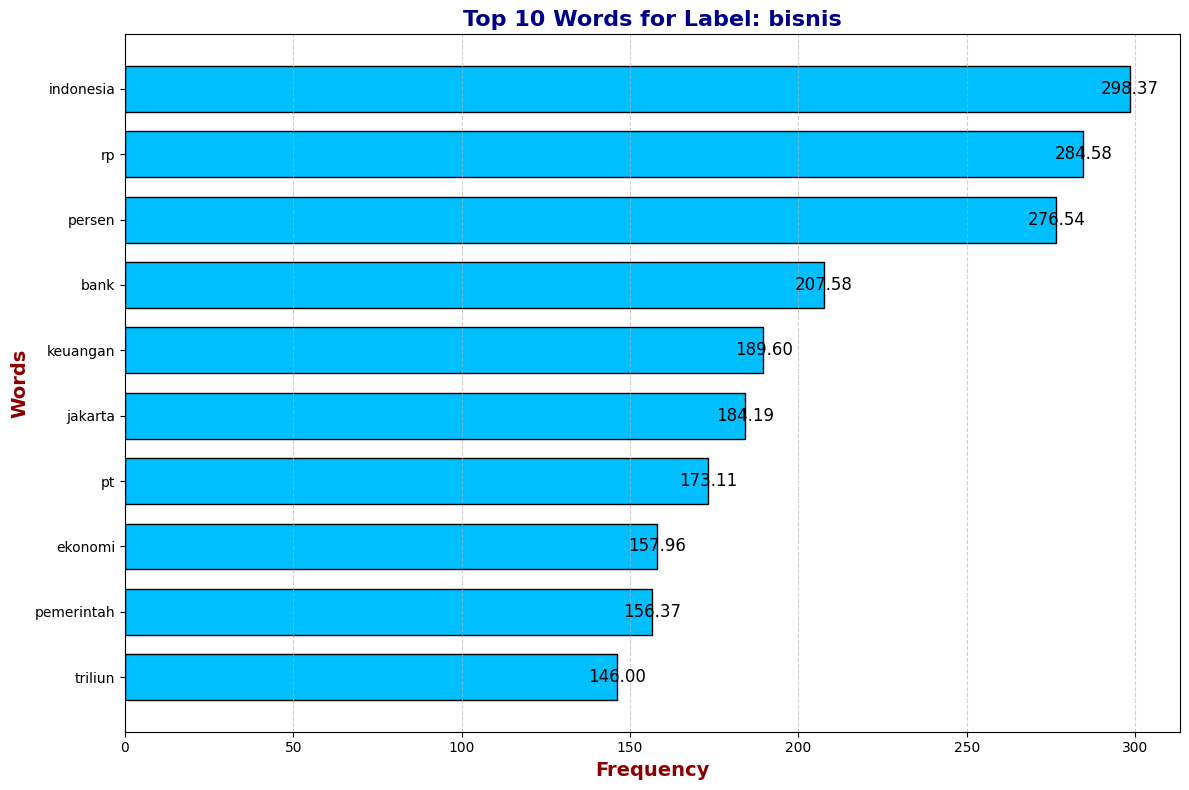

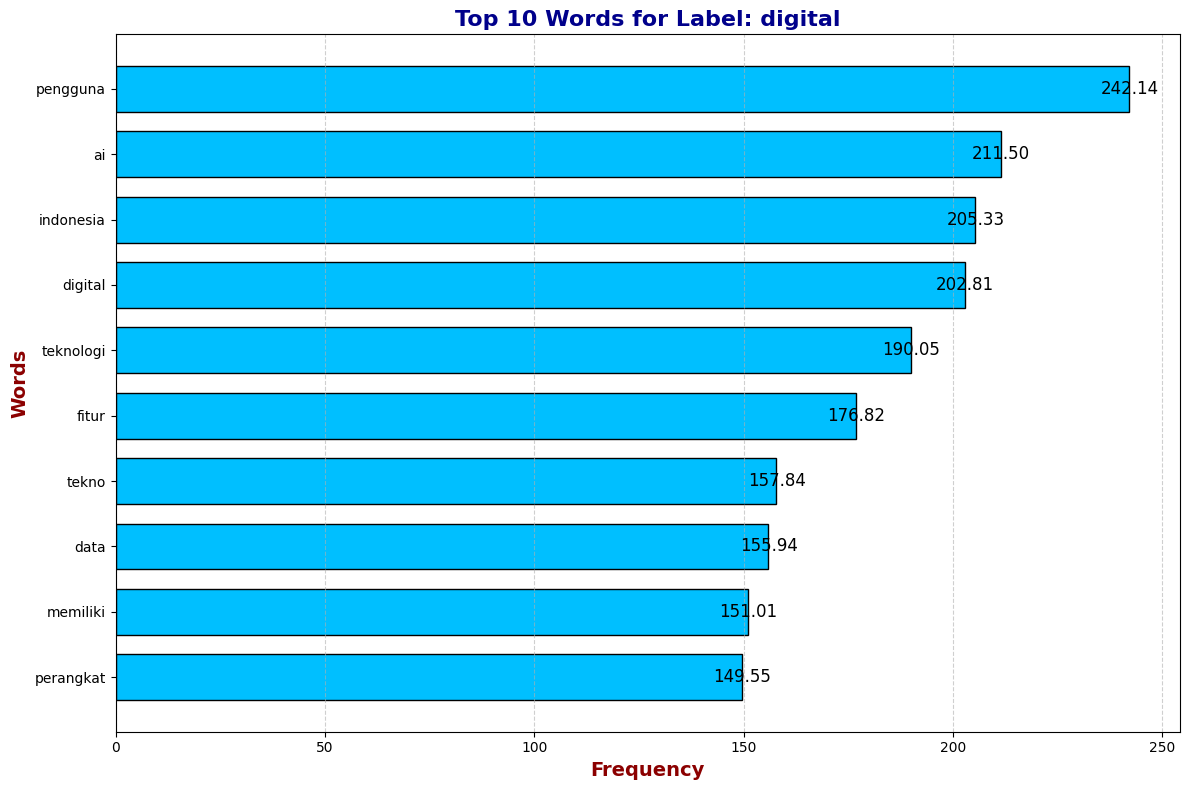

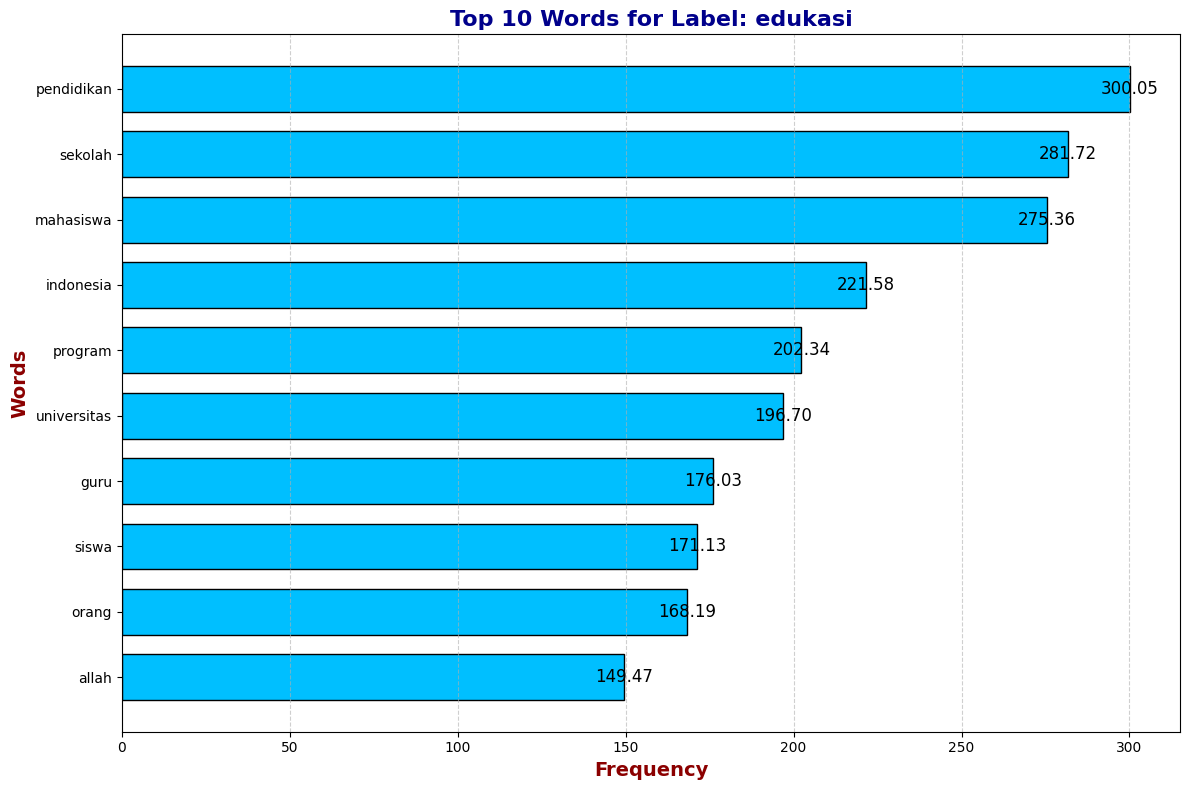

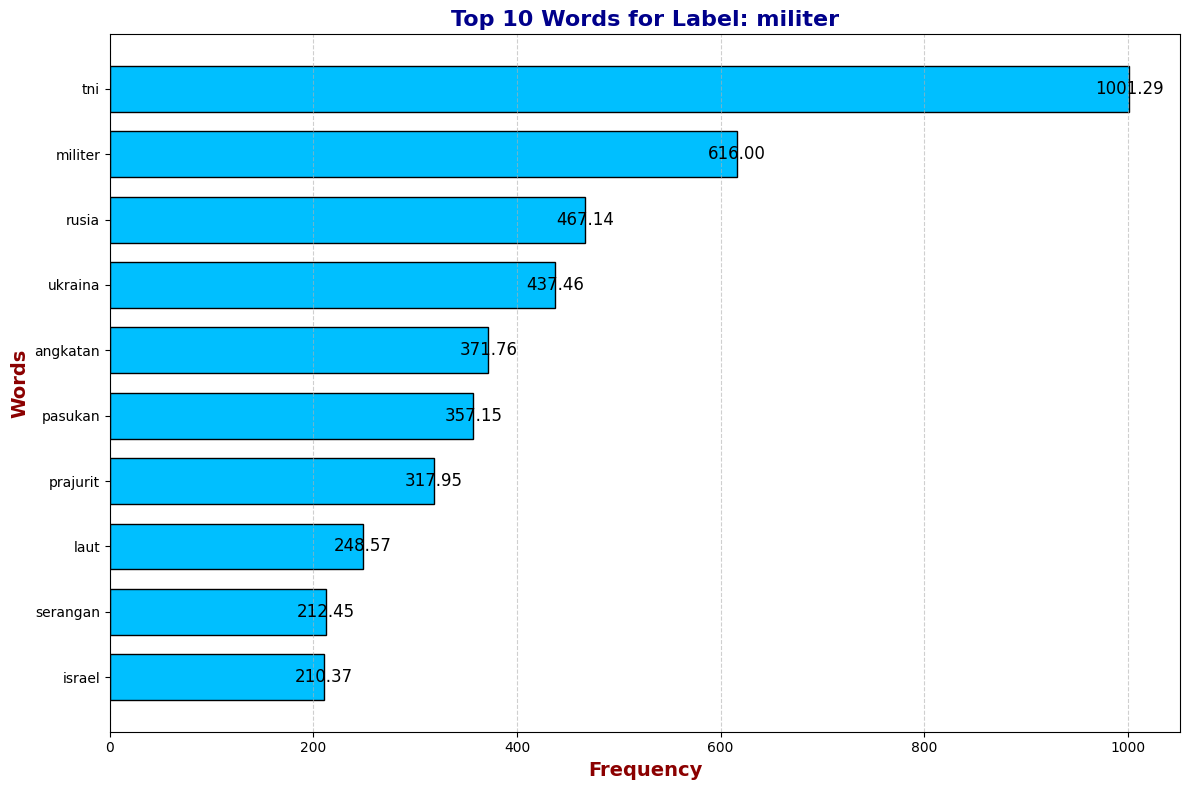

In [19]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Menggunakan TfidfVectorizer untuk menghitung frekuensi kata per label
vectorizer = TfidfVectorizer(max_features=1000)  # Mengambil 20 kata paling sering
X_tfidf = vectorizer.fit_transform(X)  # Transformasi semua teks ke fitur

# 2. Menyusun hasil untuk tiap label
words = vectorizer.get_feature_names_out()
word_counts = X_tfidf.sum(axis=0).A1  # Jumlahkan frekuensi kata per fitur
word_freq = dict(zip(words, word_counts))

# 3. Visualisasi kata paling sering per label
label_word_counts = {}  # Menyimpan frekuensi kata per label

for label in df['Label'].unique():
    label_data = df[df['Label'] == label]['Content']  # Ambil konten per label
    X_label_tfidf = vectorizer.transform(label_data)  # Transformasi teks per label
    label_word_counts[label] = X_label_tfidf.sum(axis=0).A1  # Ambil jumlah kata

# 4. Membuat visualisasi per label dengan desain yang lebih menarik
for label, counts in label_word_counts.items():
    # Ambil kata-kata dengan frekuensi tertinggi untuk setiap label
    sorted_words = [words[i] for i in counts.argsort()[::-1]]
    sorted_counts = sorted(counts, reverse=True)
    
    # Plotting
    plt.figure(figsize=(12, 8))
    plt.barh(sorted_words[:10], sorted_counts[:10], color='deepskyblue', edgecolor='black', height=0.7)
    
    # Menambahkan judul dan label dengan font yang lebih baik
    plt.title(f'Top 10 Words for Label: {label}', fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel('Frequency', fontsize=14, fontweight='bold', color='darkred')
    plt.ylabel('Words', fontsize=14, fontweight='bold', color='darkred')
    
    # Mengatur tampilan grid dan sumbu
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.gca().invert_yaxis()  # Agar kata paling sering muncul di atas
    
    # Menambahkan anotasi frekuensi pada batang
    for i in range(10):
        plt.text(sorted_counts[i] + 0.05, i, f'{sorted_counts[i]:.2f}', ha='center', va='center', fontsize=12, color='black')
    
    # Menampilkan grafik dengan penataan yang lebih baik
    plt.tight_layout()
    plt.show()